# DSC 540 Project Milestone 2

Logan Quandt

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Step One: Slice Dataframes for more recent years

In [291]:
#load in dataframe for flat file
gdp_df = pd.read_csv('/Users/logan/Documents/GitHub/DSC540/Final Project/gdp.csv')
gdp_df.head(5)

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [292]:
#slice dataframe for country name, code and more recent years to get more update to date data and limit NaNs
gdp_df_names = gdp_df[gdp_df.columns[0:2]]
gdp_df_years = gdp_df[gdp_df.columns[42:63]]

In [293]:
#merge dataframe slices back into one dataframe
gdp_df = pd.concat([gdp_df_names, gdp_df_years], axis=1)
gdp_df

,Country Name,Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,"Yemen, Rep.",YEM,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


# Step Two: Rename Headers

In [294]:
#rename headers to more accurately reflect the data and better align with other data sources
gdp_df = gdp_df.rename(columns = {'Country Name': 'Country (or dependency)', 'Code': 'Country Code'})
gdp_df

,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,"Yemen, Rep.",YEM,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


# Find Outliers

<AxesSubplot:xlabel='2020'>

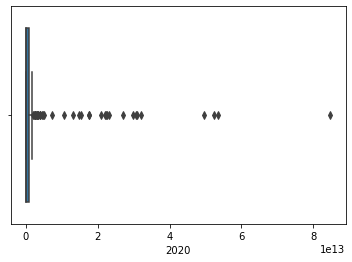

In [295]:
#visualize outliers
sns.boxplot(x=gdp_df['2020'])

In [296]:
#find outliers using describe
gdp_df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,2.470000e+02,2.480000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.540000e+02,2.540000e+02,2.550000e+02,2.550000e+02,...,2.580000e+02,2.570000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.530000e+02,2.420000e+02
mean,1.009237e+12,1.002668e+12,1.021573e+12,1.153249e+12,1.311269e+12,1.437369e+12,1.572270e+12,1.801685e+12,2.003418e+12,1.902177e+12,...,2.333419e+12,2.405010e+12,2.482543e+12,2.553374e+12,2.407493e+12,2.447400e+12,2.620694e+12,2.786905e+12,2.864964e+12,2.892666e+12
std,3.962904e+12,3.932082e+12,4.055709e+12,4.552519e+12,5.101094e+12,5.463377e+12,5.849805e+12,6.535266e+12,7.097259e+12,6.710968e+12,...,7.991609e+12,8.162961e+12,8.388441e+12,8.616240e+12,8.171350e+12,8.321991e+12,8.852537e+12,9.425221e+12,9.620595e+12,9.530218e+12
min,1.374206e+07,1.319654e+07,1.545099e+07,1.823108e+07,2.153493e+07,2.183910e+07,2.290286e+07,2.703037e+07,3.029022e+07,2.710108e+07,...,3.871181e+07,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,4.885555e+07
25%,3.058488e+09,3.074393e+09,3.106500e+09,3.503723e+09,4.137914e+09,4.868136e+09,5.372199e+09,5.949065e+09,6.786746e+09,6.686452e+09,...,8.106591e+09,8.709165e+09,8.747774e+09,9.297231e+09,8.738203e+09,8.666853e+09,9.565595e+09,1.046233e+10,1.131495e+10,1.204996e+10
50%,1.657753e+10,1.586296e+10,1.640285e+10,1.878172e+10,2.232240e+10,2.440579e+10,2.705267e+10,3.270030e+10,3.850386e+10,3.738812e+10,...,4.687279e+10,4.658046e+10,4.981676e+10,5.114388e+10,5.006595e+10,4.886913e+10,5.332271e+10,5.614404e+10,6.113687e+10,6.212830e+10
75%,2.017524e+11,1.984412e+11,1.990721e+11,2.288585e+11,2.587423e+11,3.105543e+11,3.628256e+11,4.302955e+11,5.155571e+11,4.519055e+11,...,5.521483e+11,5.524837e+11,5.447092e+11,5.456266e+11,5.051038e+11,5.261238e+11,5.666712e+11,5.634445e+11,5.972806e+11,7.441747e+11
max,3.381597e+13,3.360921e+13,3.488437e+13,3.912864e+13,4.409586e+13,4.777398e+13,5.176942e+13,5.832135e+13,6.401446e+13,6.073036e+13,...,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13,8.756805e+13,8.474698e+13


In [297]:
# find count of countries with 2020 data in bottom 25%
print(len(gdp_df.loc[gdp_df['2020'] < 3058488000]))

32


In [298]:
#filter out bottom 25% of data, keeping upper 25% as these are likely large countries we want to include
gdp_df = gdp_df.loc[gdp_df['2020'] >= 3058488000]
gdp_df

,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
5,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,World,WLD,3.381597e+13,3.360921e+13,3.488437e+13,3.912864e+13,4.409586e+13,4.777398e+13,5.176942e+13,5.832135e+13,...,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13,8.756805e+13,8.474698e+13
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


# Step Three: Find NAs

In [299]:
#use isna() to find number of NaNs in each column
gdp_df.isna().sum()

Country (or dependency)    0
Country Code               0
2000                       5
2001                       5
2002                       3
2003                       3
2004                       3
2005                       3
2006                       2
2007                       2
2008                       1
2009                       1
2010                       1
2011                       1
2012                       1
2013                       0
2014                       0
2015                       0
2016                       0
2017                       0
2018                       0
2019                       0
2020                       0
dtype: int64

In [300]:
#drop all NA records
gdp_df.dropna()

,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
5,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
7,Arab World,ARB,8.160388e+11,7.985250e+11,8.031423e+11,8.878742e+11,1.056272e+12,1.297924e+12,1.533188e+12,1.789560e+12,...,2.501780e+12,2.740553e+12,2.799579e+12,2.831681e+12,2.463580e+12,2.411981e+12,2.466443e+12,2.730780e+12,2.776469e+12,2.447584e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Vietnam,VNM,3.117252e+10,3.268520e+10,3.506411e+10,3.955251e+10,4.542785e+10,5.763326e+10,6.637166e+10,7.741443e+10,...,1.355394e+11,1.558200e+11,1.712220e+11,1.862047e+11,1.932411e+11,2.052762e+11,2.237799e+11,2.452137e+11,2.619212e+11,2.711584e+11
259,World,WLD,3.381597e+13,3.360921e+13,3.488437e+13,3.912864e+13,4.409586e+13,4.777398e+13,5.176942e+13,5.832135e+13,...,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13,8.756805e+13,8.474698e+13
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


# Step Four: Find Duplicates

In [317]:
#use duplicated and any to find if there are any duplicates in the dataframe
for columns in gdp_df:
    if any(gdp_df[columns].duplicated()):
        print('There are duplicates in', str(columns))
    else:
        print('There are no duplicates in', str(columns))

There are no duplicates in Country (or dependency)
There are no duplicates in Country Code
There are duplicates in 2000
There are duplicates in 2001
There are duplicates in 2002
There are duplicates in 2003
There are duplicates in 2004
There are duplicates in 2005
There are duplicates in 2006
There are duplicates in 2007
There are duplicates in 2008
There are duplicates in 2009
There are duplicates in 2010
There are duplicates in 2011
There are duplicates in 2012
There are duplicates in 2013
There are duplicates in 2014
There are duplicates in 2015
There are duplicates in 2016
There are duplicates in 2017
There are duplicates in 2018
There are duplicates in 2019
There are duplicates in 2020


In [325]:
duplicatecheck = gdp_df.duplicated(subset = ['2020'], keep=False)
print(gdp_df[duplicatecheck])

                       Country (or dependency) Country Code          2000  \
204                                 South Asia          SAS  6.304291e+11   
217                         Sub-Saharan Africa          SSF  4.230878e+11   
240                    South Asia (IDA & IBRD)          TSA  6.304291e+11   
241  Sub-Saharan Africa (IDA & IBRD countries)          TSS  4.230878e+11   

             2001          2002          2003          2004          2005  \
204  6.458701e+11  6.776275e+11  7.910027e+11  9.170893e+11  1.050585e+12   
217  4.059833e+11  4.412977e+11  5.561881e+11  6.915319e+11  8.213391e+11   
240  6.458701e+11  6.776275e+11  7.910027e+11  9.170893e+11  1.050585e+12   
241  4.059833e+11  4.412977e+11  5.561881e+11  6.915319e+11  8.213391e+11   

             2006          2007  ...          2011          2012  \
204  1.196088e+12  1.504193e+12  ...  2.274546e+12  2.300090e+12   
217  9.682409e+11  1.121981e+12  ...  1.614001e+12  1.677883e+12   
240  1.196088e+12  1.504

Not removing duplicates due to them being GDPs that were the same by coincidence or different regions with different values

# Step 5: Check data types

In [302]:
#check data types to see if there are columns I need to change types on
gdp_df.dtypes

Country (or dependency)     object
Country Code                object
2000                       float64
2001                       float64
2002                       float64
2003                       float64
2004                       float64
2005                       float64
2006                       float64
2007                       float64
2008                       float64
2009                       float64
2010                       float64
2011                       float64
2012                       float64
2013                       float64
2014                       float64
2015                       float64
2016                       float64
2017                       float64
2018                       float64
2019                       float64
2020                       float64
dtype: object